In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
import sys

In [18]:
nba_data=pd.read_csv('shot_logs.csv')
print ('columns:', nba_data.shape[1], '\n')
print ('DF length:', len(nba_data), '\n')
for i in nba_data.columns:
    print (i,nba_data[i][0],type(nba_data[i][0]))

columns: 21 

DF length: 128069 

GAME_ID 21400899 <class 'numpy.int64'>
MATCHUP MAR 04, 2015 - CHA @ BKN <class 'str'>
LOCATION A <class 'str'>
W W <class 'str'>
FINAL_MARGIN 24 <class 'numpy.int64'>
SHOT_NUMBER 1 <class 'numpy.int64'>
PERIOD 1 <class 'numpy.int64'>
GAME_CLOCK 1:09 <class 'str'>
SHOT_CLOCK 10.8 <class 'numpy.float64'>
DRIBBLES 2 <class 'numpy.int64'>
TOUCH_TIME 1.9 <class 'numpy.float64'>
SHOT_DIST 7.7 <class 'numpy.float64'>
PTS_TYPE 2 <class 'numpy.int64'>
SHOT_RESULT made <class 'str'>
CLOSEST_DEFENDER Anderson, Alan <class 'str'>
CLOSEST_DEFENDER_PLAYER_ID 101187 <class 'numpy.int64'>
CLOSE_DEF_DIST 1.3 <class 'numpy.float64'>
FGM 1 <class 'numpy.int64'>
PTS 2 <class 'numpy.int64'>
player_name brian roberts <class 'str'>
player_id 203148 <class 'numpy.int64'>


In [19]:
nba_data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [20]:
nba_data=nba_data[nba_data['TOUCH_TIME']>0]
#for cleaning the data

In [21]:
nba_data.loc[(nba_data['GAME_ID'].isnull()) |
             (nba_data['MATCHUP'].isnull()) |
            (nba_data['FINAL_MARGIN'].isnull()) |
            (nba_data['W'].isnull()) | (nba_data['SHOT_NUMBER'].isnull())|
             (nba_data['PERIOD'].isnull()) | 
             (nba_data['GAME_CLOCK'].isnull()) |
             (nba_data['SHOT_CLOCK'].isnull()) |
             (nba_data['DRIBBLES'].isnull()) |
             (nba_data['TOUCH_TIME'].isnull()) |
             (nba_data['SHOT_DIST'].isnull()) |
             (nba_data['PTS_TYPE'].isnull()) |
             (nba_data['SHOT_RESULT'].isnull()) |
             (nba_data['CLOSEST_DEFENDER'].isnull()) |
             (nba_data['CLOSEST_DEFENDER_PLAYER_ID'].isnull()) |
             (nba_data['CLOSE_DEF_DIST'].isnull()) |
             
             (nba_data['PTS'].isnull()) |
             (nba_data['player_name'].isnull()) |
             (nba_data['player_id'].isnull())]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
24,21400845,"FEB 25, 2015 - CHA @ CHI",A,W,12,6,2,0:04,NaN,0,...,25.2,3,missed,"Butler, Jimmy",202710,3.6,0,0,brian roberts,203148
54,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,14,4,0:01,NaN,5,...,34.4,3,missed,"Hill, George",201588,3.6,0,0,brian roberts,203148
76,21400742,"FEB 05, 2015 - CHA vs. WAS",H,W,7,10,3,0:01,NaN,2,...,13.1,2,made,"Butler, Rasual",2446,2.5,1,2,brian roberts,203148
129,21400611,"JAN 19, 2015 - CHA vs. MIN",H,W,25,7,2,0:02,NaN,5,...,12.0,2,missed,"Williams, Mo",2590,4.0,0,0,brian roberts,203148
134,21400611,"JAN 19, 2015 - CHA vs. MIN",H,W,25,12,3,0:03,NaN,2,...,17.9,2,missed,"Daniels, Troy",203584,2.7,0,0,brian roberts,203148
141,21400600,"JAN 17, 2015 - CHA vs. IND",H,W,9,7,2,0:03,NaN,2,...,10.4,2,made,"Sloan, Donald",202388,2.7,1,2,brian roberts,203148
145,21400600,"JAN 17, 2015 - CHA vs. IND",H,W,9,11,3,0:01,NaN,6,...,18.3,2,missed,"Rudez, Damjan",204014,2.2,0,0,brian roberts,203148
184,21400478,"DEC 31, 2014 - CHA @ HOU",A,L,-19,7,4,0:13,NaN,3,...,27.1,3,missed,"Canaan, Isaiah",203477,5.6,0,0,brian roberts,203148
204,21400423,"DEC 23, 2014 - CHA @ MIL",A,W,7,1,1,0:01,NaN,2,...,32.9,3,missed,"Dudley, Jared",201162,4.1,0,0,brian roberts,203148


In [201]:

cols = ['FINAL_MARGIN','SHOT_NUMBER','PERIOD','DRIBBLES','TOUCH_TIME','SHOT_DIST','FGM']
nba_data=nba_data[cols]
X = nba_data.iloc[500:2000, [1,2,3,4,5]].values
y = nba_data.iloc[500:2000,6].values
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [202]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

C:\Users\Prashukla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [203]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

C:\Users\Prashukla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [204]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

C:\Users\Prashukla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [205]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.563333333333
Test accuracy: 0.563333333333


In [206]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('green', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label='Benign' if cl == 2 else 'Malignant')



In [207]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, p=2,
metric='minkowski',leaf_size=30)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

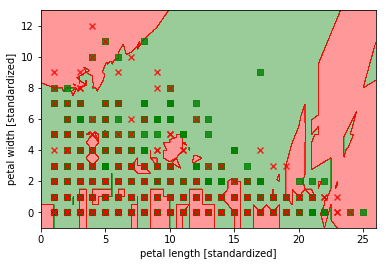

In [208]:
plot_decision_regions(X,y,classifier=knn)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()

In [174]:
knn.score(X_test, y_test, sample_weight=None)

0.58999999999999997

C:\Users\Prashukla\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Prashukla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
